## Compute the covariance between three variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("Group1.csv")
# df.head()
# df.describe()

df.cov()

,S1,S2,S3
S1,403.333112,501.950304,512.664400
S2,501.950304,3528.406081,2911.589497
S3,512.664400,2911.589497,3778.218684


## Compute the correlation coefficients between three variables

In [3]:
df.corr()

,S1,S2,S3
S1,1.000000,0.420765,0.415296
S2,0.420765,1.000000,0.797439
S3,0.415296,0.797439,1.000000


## Plot and report the relationships between the variables

array([[<Axes: xlabel='S1', ylabel='S1'>,
        <Axes: xlabel='S2', ylabel='S1'>,
        <Axes: xlabel='S3', ylabel='S1'>],
       [<Axes: xlabel='S1', ylabel='S2'>,
        <Axes: xlabel='S2', ylabel='S2'>,
        <Axes: xlabel='S3', ylabel='S2'>],
       [<Axes: xlabel='S1', ylabel='S3'>,
        <Axes: xlabel='S2', ylabel='S3'>,
        <Axes: xlabel='S3', ylabel='S3'>]], dtype=object)

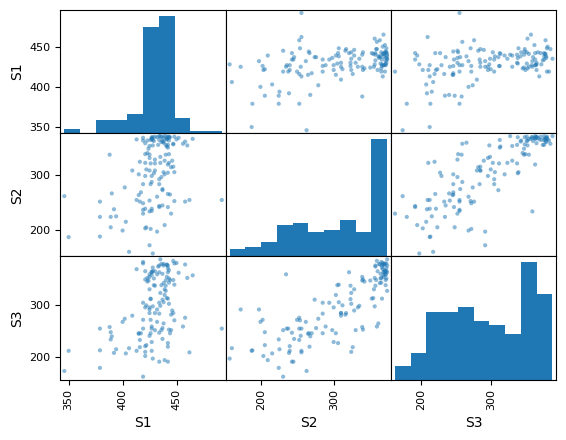

In [4]:
pd.plotting.scatter_matrix(df)

## Generate a random sample of 50 observations for each sensor
## Compute the upper and the lower bounds with confidence intervals 90%, 95%, 99%.
## Compare the population means of each sample with the estimated one given the samples


In [9]:
z_values = [[90, 1.645], [95, 1.96], [99, 2.576]]
    
for col in df:
    p_mean = df[col].mean()
    s = df[col].sample(n=50)
    mean = s.mean()
    size = s.size
    std = s.std()
    print('\nMean of the sample :', mean)
    print('Mean of the whole population is {:.2f}'.format(p_mean))
    for item in z_values:
        ampl = item[1] * std / size ** 0.5
        lower = mean - ampl
        upper = mean + ampl
        print("For {}% confident interval for {} it's range from {:.2f} to {:.2f}, pop. mean is inside: {}".format(
        item[0], col, lower, upper, lower <= p_mean <= upper))
    


Mean of the sample : 432.54
Mean of the whole population is 428.65
For 90% confident interval for S1 it's range from 428.77 to 436.31, pop. mean is inside: False
For 95% confident interval for S1 it's range from 428.05 to 437.03, pop. mean is inside: True
For 99% confident interval for S1 it's range from 426.64 to 438.44, pop. mean is inside: True

Mean of the sample : 290.3
Mean of the whole population is 304.84
For 90% confident interval for S2 it's range from 275.23 to 305.37, pop. mean is inside: True
For 95% confident interval for S2 it's range from 272.34 to 308.26, pop. mean is inside: True
For 99% confident interval for S2 it's range from 266.70 to 313.90, pop. mean is inside: True

Mean of the sample : 294.46
Mean of the whole population is 296.68
For 90% confident interval for S3 it's range from 280.26 to 308.66, pop. mean is inside: True
For 95% confident interval for S3 it's range from 277.54 to 311.38, pop. mean is inside: True
For 99% confident interval for S3 it's range

# _Additional_

**Let's make the script harder and check how many times p_mean will occur outside the confidence interval in 10,000 experiments**

In [69]:
z_values = [[90, 1.645], [95, 1.96], [99, 2.576]]

for col in df:
    p_mean = df[col].mean()    
    for item in z_values:        
        counter = 0
        for _ in range(10000):
            s = df[col].sample(n=50,)
            mean = s.mean()
            ampl = item[1] * s.std() / s.size ** 0.5
            if not mean - ampl <= p_mean <= mean + ampl:
                counter += 1
        print("in {} {} out of 10,000 times population mean occured outside the {}% CI".format(
        col, counter, item[0]))
    print()    

in S1 516 out of 10,000 times population mean occured outside the 90% CI
in S1 249 out of 10,000 times population mean occured outside the 95% CI
in S1 47 out of 10,000 times population mean occured outside the 99% CI

in S2 438 out of 10,000 times population mean occured outside the 90% CI
in S2 197 out of 10,000 times population mean occured outside the 95% CI
in S2 21 out of 10,000 times population mean occured outside the 99% CI

in S3 417 out of 10,000 times population mean occured outside the 90% CI
in S3 151 out of 10,000 times population mean occured outside the 95% CI
in S3 30 out of 10,000 times population mean occured outside the 99% CI



**It's look like results are twice or even less than expected**

Okay then, maybe it's because of population, let's have a normal distributed population

In [70]:
df_norm = pd.DataFrame(np.random.normal(400, 40, 135), columns=['S1'])
p_mean = df_norm['S1'].mean()
z_values = [[90, 1.645], [95, 1.96], [99, 2.576]]

for item in z_values:        
    counter = 0
    for _ in range(10000):
        s = df_norm['S1'].sample(n=50)
        mean = s.mean()
        ampl = item[1] * s.std() / (s.size ** 0.5)
        if not mean - ampl <= p_mean <= mean + ampl:
            counter += 1
    print("There is {} out of 10,000 times population mean occured outside the {}% CI".format(
    counter, item[0]))  

There is 427 out of 10,000 times population mean occured outside the 90% CI
There is 160 out of 10,000 times population mean occured outside the 95% CI
There is 24 out of 10,000 times population mean occured outside the 99% CI


No, the same result:(

**Let's try the same with a bigger population (135 -> 10,000) :**

In [71]:
df_norm = pd.DataFrame(np.random.normal(400, 40, 10000), columns=['S1'])
p_mean = df_norm['S1'].mean()
z_values = [[90, 1.645], [95, 1.96], [99, 2.576]]

for item in z_values:        
    counter = 0
    for _ in range(10000):
        s = df_norm['S1'].sample(n=50)
        mean = s.mean()
        ampl = item[1] * s.std() / (s.size ** 0.5)
        if not mean - ampl <= p_mean <= mean + ampl:
            counter += 1
    print("There is {} out of 10,000 times population mean occured outside the {}% CI".format(
    counter, item[0]))  
    

There is 1032 out of 10,000 times population mean occured outside the 90% CI
There is 506 out of 10,000 times population mean occured outside the 95% CI
There is 141 out of 10,000 times population mean occured outside the 99% CI


**Perfect!**
**So, Ronald gave me another clue: the 'replace' parameter in DataFrame.sample, let's try that out**

In [72]:
df_norm = pd.DataFrame(np.random.normal(400, 40, 135), columns=['S1'])
p_mean = df_norm['S1'].mean()
z_values = [[90, 1.645], [95, 1.96], [99, 2.576]]

for item in z_values:        
    counter = 0
    for _ in range(10000):
        s = df_norm['S1'].sample(n=50, replace=True)
        mean = s.mean()
        ampl = item[1] * s.std() / (s.size ** 0.5)
        if not mean - ampl <= p_mean <= mean + ampl:
            counter += 1
    print("There is {} out of 10,000 times population mean occured outside the {}% CI".format(
    counter, item[0]))  

There is 1064 out of 10,000 times population mean occured outside the 90% CI
There is 547 out of 10,000 times population mean occured outside the 95% CI
There is 134 out of 10,000 times population mean occured outside the 99% CI


**It works!**

In [75]:
from scipy.stats import norm

z_50 = norm.ppf(0.75)    # we want 25.0% in each tail, so use .750
z_95 = norm.ppf(0.975)   # we want  2.5% in each tail, so use .975
z_99 = norm.ppf(0.995)   # we want  0.5% in each tail, so use .995
print(f'z value for 50% CI = {z_50:.3f}')
print(f'z value for 95% CI = {z_95:.3f}')
print(f'z value for 99% CI = {z_99:.3f}')

z value for 50% CI = 0.674
z value for 95% CI = 1.960
z value for 99% CI = 2.576
